In [40]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from itertools import combinations

In [3]:
#Creazione del Dataset e scaling del Dataset

In [4]:
df_magic = pd.read_csv('magic04.data', header = None)

In [5]:
df_magic
df_magic.columns = ['Lenght', 'Width', 'Size', 'Conc', 'Conc1', 'Asym', 'M3Long', 'M3Trans', 'Alpha', 'Dist', 'Class']
df_magic

,Lenght,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [6]:
le = LabelEncoder()
y = le.fit_transform(df_magic['Class'].values)
df_magic['Class'] = y

In [7]:
df_magic

,Lenght,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,1
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,1


In [8]:
X,y  = df_magic.iloc[:,:-1].values, df_magic.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 0, stratify= y)

X_train = X_train[:100]
y_train = y_train[:100]
X_test = X_test[:100]
y_test = y_test[:100]

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [57]:
# SUPPORT VECTOR MACHINE with scikit-learn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.base import clone


In [34]:
class SBS():
    def __init__(self, estimator, k_features, scoring = accuracy_score, test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X,y):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train,y_train, X_test, y_test,self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r = dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)

                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self,X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score  

In [35]:
from sklearn.svm import SVC

#Creazione del classificatore
clf = SVC(kernel="rbf", C=1, gamma=0.1) #perché C 1 e gamma 0.1, mistero
#pipeline = make_pipeline(StandardScaler(), clf)
#Addestramento del Classificatore
clf.fit(X_train_std, y_train)

# Calcolo accuratezza
print('Accuratezza sul training set: %.3f' % clf.score(X_train, y_train))
print('Accuratezza sul test set: %.3f' % clf.score(X_test, y_test))

Accuratezza sul training set: 0.340
Accuratezza sul test set: 0.370


In [36]:
#GRID search e Cross validation

In [37]:
from sklearn.model_selection import GridSearchCV

# Creazione della griglia di iperparametri
param_grid = [{'kernel': ['rbf'], 'C': [0.01,0.1,1], 'gamma': [0.1,1,10]}]

# Numero di fold per la Cross-validation
n_folds = 3

# Creazione di un oggetto di tipo GridSearchCV
grid_search_cv = GridSearchCV(clf, param_grid, cv=n_folds)

# Esecuzione della ricerca degli iperparametri 
grid_search_cv.fit(X_train, y_train)

# Stampa risultati
print('Combinazioni di parametri:\n', grid_search_cv.cv_results_['params'])
print('Accuratezza media per combinazione:\n', grid_search_cv.cv_results_['mean_test_score'])
print('Combinazione migliore:\n', grid_search_cv.best_params_)
print('Accuratezza media della combinazione migliore: %.3f' % grid_search_cv.best_score_)

Combinazioni di parametri:
 [{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}, {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}, {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}, {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'gamma': 1, 'kernel': 'rbf'}, {'C': 1, 'gamma': 10, 'kernel': 'rbf'}]
Accuratezza media per combinazione:
 [0.66013072 0.66013072 0.66013072 0.66013072 0.66013072 0.66013072
 0.66013072 0.66013072 0.66013072]
Combinazione migliore:
 {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
Accuratezza media della combinazione migliore: 0.660


In [38]:
#feature selection : SBS

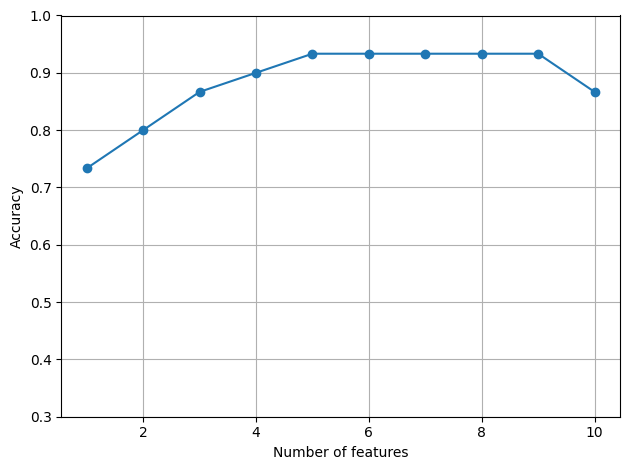

In [45]:
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
sbs = SBS(clf, k_features= 1)
sbs.fit(X_train_std, y_train)
k_feat  = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.3,1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [48]:
sbs = SBS(clf, k_features = 6)


In [50]:
from sklearn.pipeline import make_pipeline

pipe_clf_sbs = make_pipeline(StandardScaler(), sbs, clf)
#n_components = [6,7]
#C_range = [0.1,1,10]
#param_grid_clf_sbs = [{'C': [1], 'gamma': [0.1], 'sequentialfeatureselector__n_features_to_select': n_components}]
param_grid_clf_sbs = [{'svc__C': [0.01,0.1,1], 'svc__gamma': [0.1, 1, 10]}]

gs_clf_sbs = GridSearchCV(estimator = pipe_clf_sbs, param_grid = param_grid_clf_sbs, cv=10, refit = True)
gs_clf_sbs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sbs',
                                        <__main__.SBS object at 0x00000249158D8A90>),
                                       ('svc', SVC(C=1, gamma=0.1))]),
             param_grid=[{'svc__C': [0.01, 0.1, 1],
                          'svc__gamma': [0.1, 1, 10]}])

In [51]:
best_clf_sbs_acc = gs_clf_sbs.best_estimator_
best_clf_sbs_acc.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sbs', <__main__.SBS object at 0x00000249158BF250>),
                ('svc', SVC(C=1, gamma=0.1))])>

In [52]:
print('La accuracy del best classificatore:', best_clf_sbs_acc)
best_clf_sbs_acc.fit(X_train, y_train)

La accuracy del best classificatore: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sbs', <__main__.SBS object at 0x00000249158BF250>),
                ('svc', SVC(C=1, gamma=0.1))])


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sbs', <__main__.SBS object at 0x00000249158BF250>),
                ('svc', SVC(C=1, gamma=0.1))])

In [58]:
# Cross validation
cv_score = cross_val_score(estimator = best_clf_sbs_acc, X= X_train, y= y_train, cv=n_folds)
print('CV accuracy score:', np.mean(cv_score))
print('Accuracy sul test data: ', best_clf_sbs_acc.score(X_test, y_test))
print('Accuracy sul train data: ', best_clf_sbs_acc.score(X_train, y_train))

CV accuracy score: 0.810754604872252
Accuracy sul test data:  0.8
Accuracy sul train data:  0.88
